# Create a Tessellation from a GeoDataFrame

This Jupyter Notebook demonstrates the usage of a custom `tessellate` function designed to tessellate geometries within a [GeoDataFrame](https://geopandas.org/en/stable/docs/reference/api/geopandas.GeoDataFrame.html) into hexagonal cells using [H3](https://h3geo.org), a hierarchical hexagonal geospatial indexing system. The `tessellate` function takes a [GeoDataFrame](https://geopandas.org/en/stable/docs/reference/api/geopandas.GeoDataFrame.html) with geometries, such as polygons or multipolygons, and converts them to [EPSG:4326](https://epsg.io/4326) CRS before tessellating them into hexagonal cells at a specified resolution. The resulting tessellated geometries are then plotted alongside the original geometries for comparison.                                                                                                                                        

## Requirements

In [1]:
import geopandas as gpd
import matplotlib.pyplot as plt

from mobilyze.tessellation import tessellate

## Area of Interest

In this example, we use [geoBoundaries](https://www.geoboundaries.org) to obtain [first-level administrative boundaries of of Brazil](https://www.geoboundaries.org/countryDownloads.html).

In [2]:
BRA = gpd.read_file(
    "https://github.com/wmgeolab/geoBoundaries/raw/9469f09/releaseData/gbOpen/BRA/ADM1/geoBoundaries-BRA-ADM1.geojson"
)
BRA.explore()

## Results

Now, we apply the `tessellate` function to tessellate the the region into hexagonal cells at a specified resolution. We choose **resolution 7**, for which each hexagon area area averages approximatey 5 square km.

In [3]:
tessellated_gdf = tessellate(BRA, columns=["shapeName"], resolution=7)

Let's examine the dataframe with the newly computed `index` and `geometry`, representing the H3 hexagons at the designated resolution.

In [4]:
tessellated_gdf

shapeName  \
875f04800ffffff               Para   
875f04801ffffff               Para   
875f04802ffffff               Para   
875f04803ffffff               Para   
875f04804ffffff               Para   
...                            ...   
87c2dbdb2ffffff  Rio Grande do Sul   
87c2dbdb3ffffff  Rio Grande do Sul   
87c2dbdb4ffffff  Rio Grande do Sul   
87c2dbdb5ffffff  Rio Grande do Sul   
87c2dbdb6ffffff  Rio Grande do Sul   

                                                          geometry  
875f04800ffffff  POLYGON ((-55.98339 2.29946, -55.97644 2.31093...  
875f04801ffffff  POLYGON ((-56.00248 2.31118, -55.99553 2.32265...  
875f04802ffffff  POLYGON ((-55.96341 2.31081, -55.95646 2.32228...  
875f04803ffffff  POLYGON ((-55.98251 2.32253, -55.97556 2.33400...  
875f04804ffffff  POLYGON ((-55.98426 2.27638, -55.97731 2.28786...  
...                                                            ...  
87c2dbdb2ffffff  POLYGON ((-55.71972 -30.77952, -55.71239 -30.7...  
87c2dbdb3ffffff  POLYGON ((-55.73985 -30.76760, -55.73253 -30.7...  
87c2dbdb4ffffff  POLYGON ((-55.74169 -30.80518, -55.73436 -30.7...  
87c2dbdb5ffffff  POLYGON ((-55.76182 -30.79326, -55.75450 -30.7...  
87c2dbdb6ffffff  POLYGON ((-55.72063 -30.79831, -55.71331 -30.7...  

[1544274 rows x 2 columns]

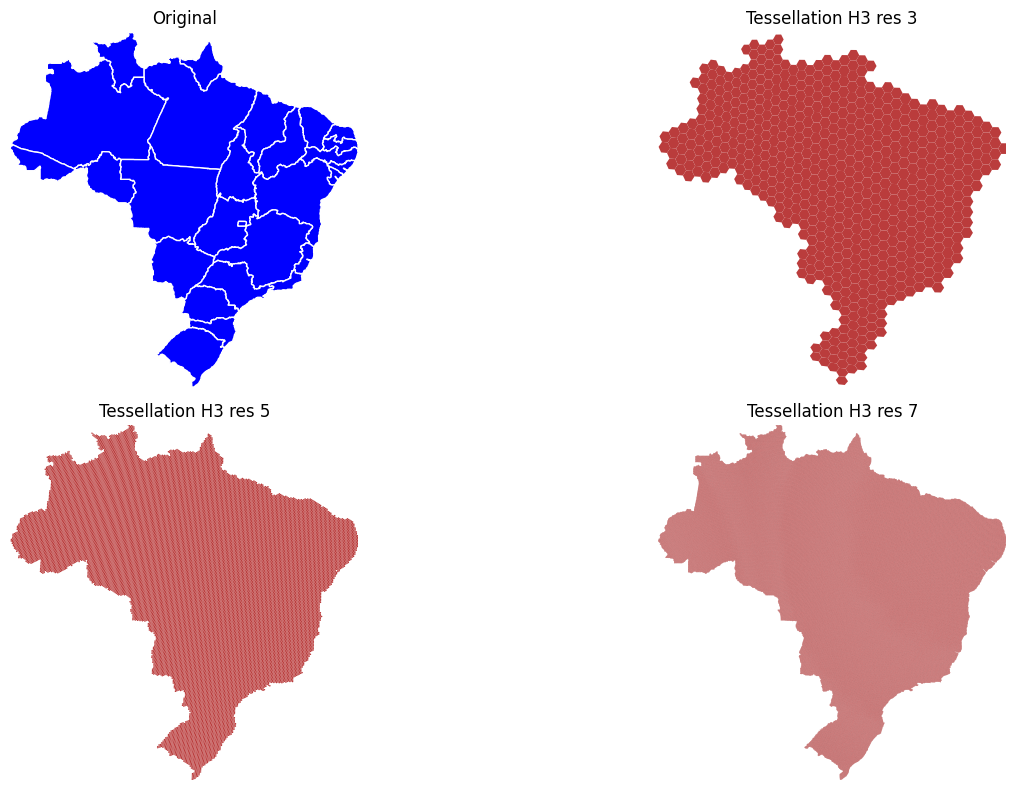

In [14]:
# Plot the original and tessellated geometries in a 2x2 grid
fig, axs = plt.subplots(2, 2, figsize=(16, 8))

# Extract bounds for consistent axis limits across subplots
x_min, y_min, x_max, y_max = BRA.total_bounds

# Plot the original geometry
ax = axs[0][0]
BRA.plot(ax=ax, color="blue", edgecolor="white")
ax.set_title("Original")
ax.set_xlim(x_min, x_max)
ax.set_ylim(y_min, y_max)
ax.set_axis_off()

# Plot tessellation at H3 resolution 3
ax = axs[0][1]
tessellate(BRA, resolution=3).plot(ax=ax, color="#ba3c3c", edgecolor=None)
ax.set_title("Tessellation H3 res 3")
ax.set_xlim(x_min, x_max)
ax.set_ylim(y_min, y_max)
ax.set_axis_off()

# Plot tessellation at H3 resolution 5
ax = axs[1][0]
tessellate(BRA, resolution=5).plot(ax=ax, color="#ba3c3c", edgecolor=None)
ax.set_title("Tessellation H3 res 5")
ax.set_xlim(x_min, x_max)
ax.set_ylim(y_min, y_max)
ax.set_axis_off()

# Plot tessellation at H3 resolution 7
ax = axs[1][1]
tessellated_gdf.plot(ax=ax, color="#ba3c3c", edgecolor=None)
ax.set_title("Tessellation H3 res 7")
ax.set_xlim(x_min, x_max)
ax.set_ylim(y_min, y_max)
ax.set_axis_off()

plt.tight_layout()
plt.show()